In [1]:
pip install pandas numpy seaborn matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = "dataset.csv"  # Adjust the file path as necessary
data = pd.read_csv(file_path)

In [4]:
# Display basic dataset information
print("Dataset Overview:\n")
data.info()

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4),

In [6]:
# Display the first few rows of the dataset
print("\nSample Data:\n")
data.head()


Sample Data:



,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [10]:
# Check for missing values
print("\nMissing Values:\n")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_data.sort_values(by="Missing Values", ascending=False))


Missing Values:

                Missing Values  Percentage
cylinders                  105   10.479042
description                 56    5.588822
interior_color              38    3.792415
mileage                     34    3.393214
price                       23    2.295409
fuel                         7    0.698603
doors                        7    0.698603
exterior_color               5    0.499002
body                         3    0.299401
engine                       2    0.199601
transmission                 2    0.199601
trim                         1    0.099800
name                         0    0.000000
model                        0    0.000000
make                         0    0.000000
year                         0    0.000000
drivetrain                   0    0.000000


In [11]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}\n")


Number of duplicate rows: 24



In [12]:
# Statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:\n")
print(data.describe())


Statistical Summary of Numerical Features:

              year          price   cylinders      mileage       doors
count  1002.000000     979.000000  897.000000   968.000000  995.000000
mean   2023.916168   50202.985700    4.975474    69.033058    3.943719
std       0.298109   18700.392062    1.392526   507.435745    0.274409
min    2023.000000       0.000000    0.000000     0.000000    2.000000
25%    2024.000000   36600.000000    4.000000     4.000000    4.000000
50%    2024.000000   47165.000000    4.000000     8.000000    4.000000
75%    2024.000000   58919.500000    6.000000    13.000000    4.000000
max    2025.000000  195895.000000    8.000000  9711.000000    5.000000


In [14]:
# Statistical summary of categorical features
print("\nStatistical Summary of Categorical Features:\n")
data.describe(include=['object'])


Statistical Summary of Categorical Features:



,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,130,664,325,69,704,81,510,461


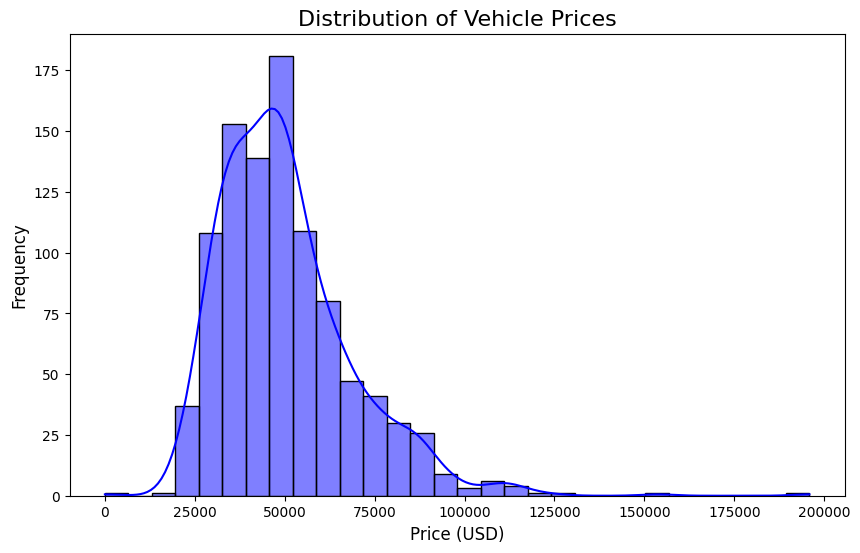

In [16]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Vehicle Prices", fontsize=16)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

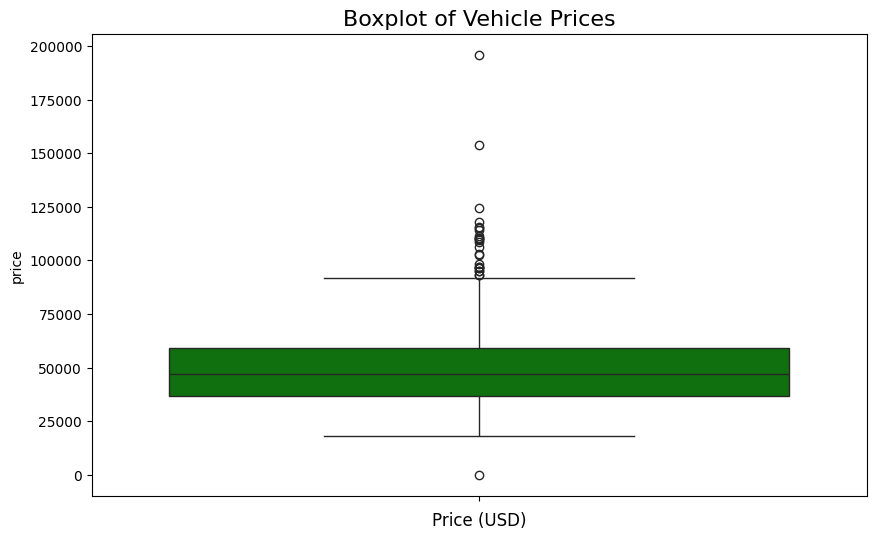

In [18]:
# Boxplot for detecting outliers in the price
plt.figure(figsize=(10, 6))
sns.boxplot(data['price'], color='green')
plt.title("Boxplot of Vehicle Prices", fontsize=16)
plt.xlabel("Price (USD)", fontsize=12)
plt.show()

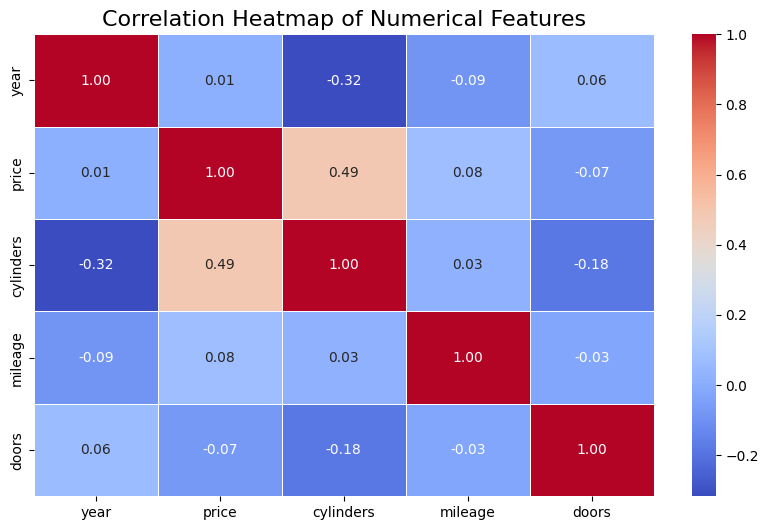

In [20]:
# Correlation heatmap for numerical features
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

<ipython-input-22-e881c2e51171>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="make", order=data["make"].value_counts().index, palette="viridis")


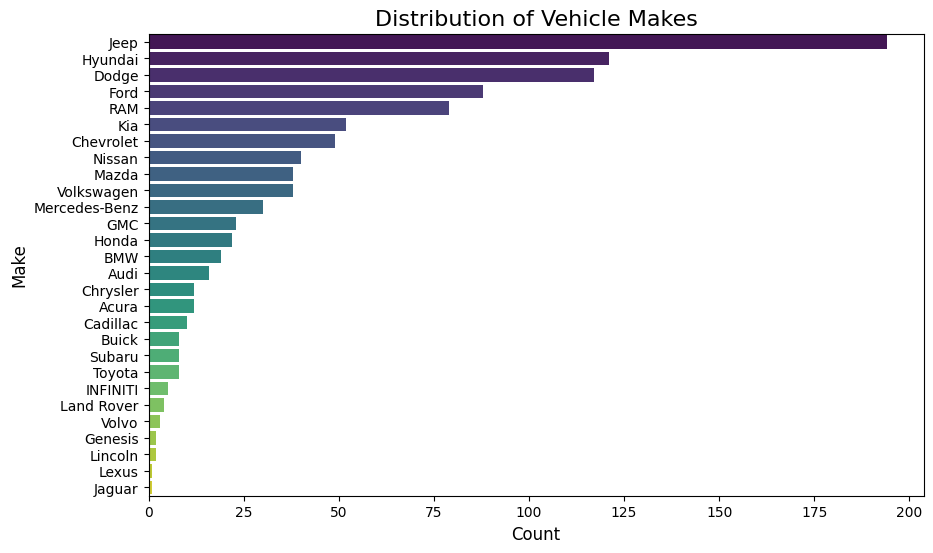

In [22]:
# Countplot for categorical feature: make
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y="make", order=data["make"].value_counts().index, palette="viridis")
plt.title("Distribution of Vehicle Makes", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Make", fontsize=12)
plt.show()

<ipython-input-24-600e861b2dcc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="fuel", y="price", palette="Set2")


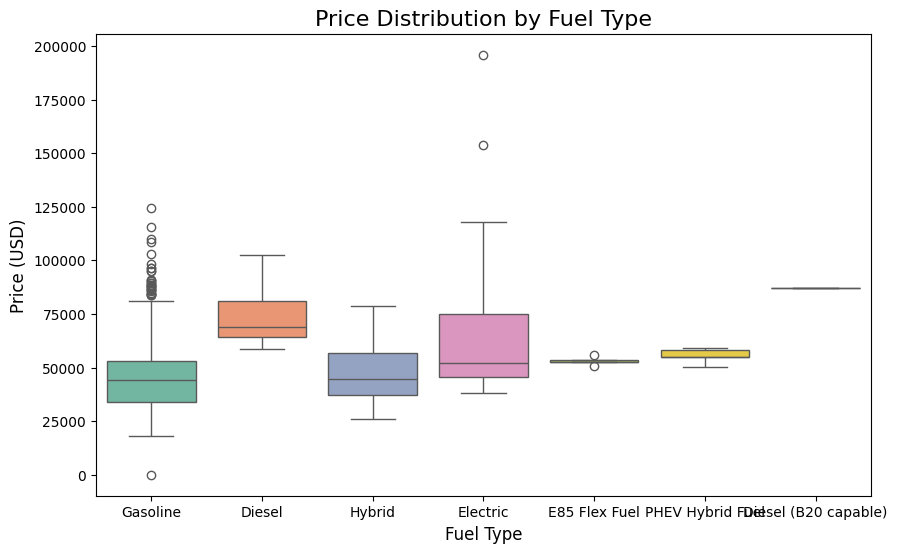

In [24]:
# Analyze price by categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="fuel", y="price", palette="Set2")
plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

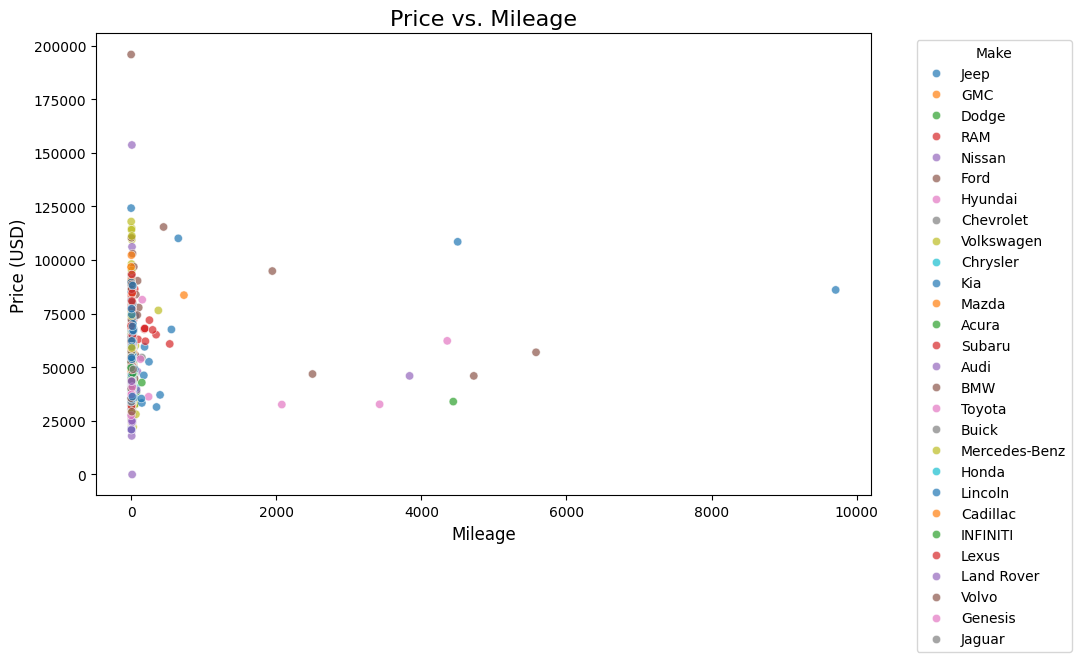

In [26]:
# Scatterplot for price vs mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="mileage", y="price", hue="make", palette="tab10", alpha=0.7)
plt.title("Price vs. Mileage", fontsize=16)
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1000x1000 with 0 Axes>

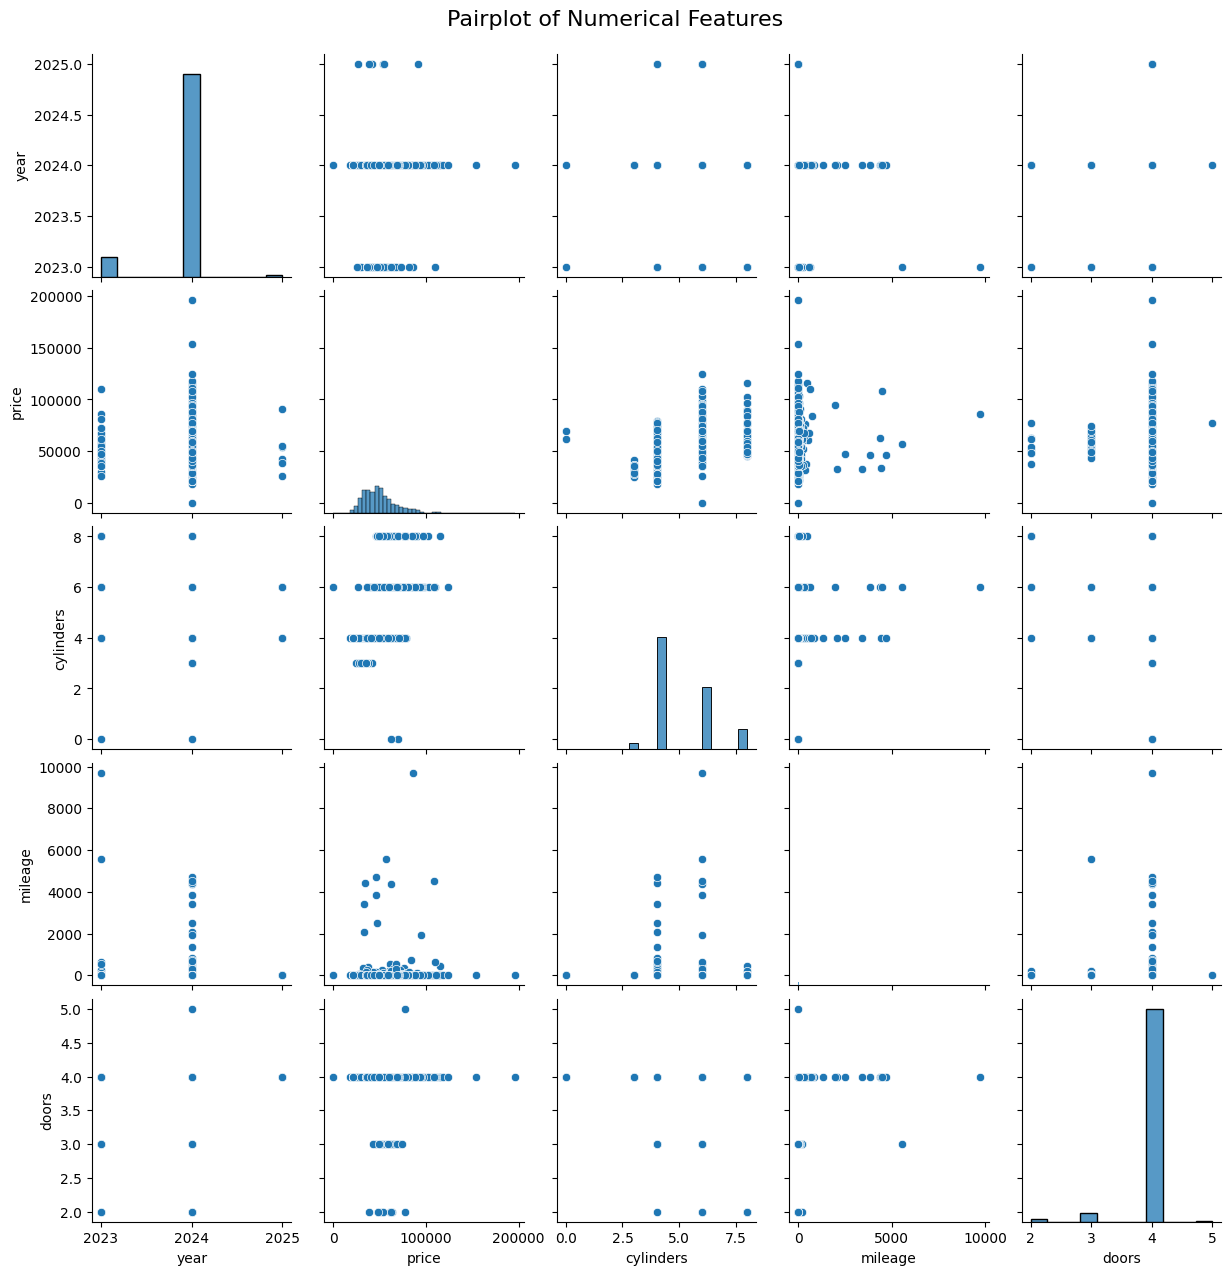

In [27]:
# Pairplot for numerical features
plt.figure(figsize=(10, 10))
sns.pairplot(data[numeric_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

In [28]:

# Summarize findings
print("\nEDA Findings:")
print("1. Significant missing values in 'description', 'price', 'cylinders', and 'mileage'.")
print("2. Duplicate rows found: {duplicates}.")
print("3. 'price' distribution is skewed with noticeable outliers.")
print("4. Weak to moderate correlations between 'price' and 'cylinders' (0.49).")
print("5. Categorical features like 'make' and 'fuel' influence 'price'.")


EDA Findings:
1. Significant missing values in 'description', 'price', 'cylinders', and 'mileage'.
2. Duplicate rows found: {duplicates}.
3. 'price' distribution is skewed with noticeable outliers.
4. Weak to moderate correlations between 'price' and 'cylinders' (0.49).
5. Categorical features like 'make' and 'fuel' influence 'price'.


##EDA Summary
##1. Missing Values:

Columns with significant missing values:
description: 56 missing (5.59%).
price: 23 missing (2.30%).
cylinders: 105 missing (10.48%).
mileage: 34 missing (3.39%).
interior_color: 38 missing (3.79%).
Action: Handle missing values using imputation strategies or dropping rows/columns based on their importance.

##2. Duplicate Rows:

24 duplicate rows detected in the dataset.
Action: Remove duplicate rows to avoid skewing results.

##3. Target Variable Analysis (price):

The distribution is right-skewed, with many vehicles priced below $50,000 and a few outliers with very high prices.

Outliers: A boxplot reveals extreme values for price,including some at
 0 doller and above 150,000 doller.

Action: Investigate and handle these outliers (e.g., filter out rows with price ≤ 0 or values exceeding a reasonable threshold).

##4. Correlation Analysis:

Notable Correlations:
price is positively correlated with cylinders (0.49), suggesting larger engines might contribute to higher prices.
price has weak positive correlations with year (0.01) and mileage (0.08).
Doors is weakly negatively correlated with price (-0.07).
Overall, the correlations among numerical features are relatively weak.
